In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Cleaned_StudentPerf_Final_Selected_Encoded.csv")

# Create a custom average performance score
df["Performance_Score"] = df[[
    "10th_Grade_Performance",
    "12th_Grade_Performance",
    "Internal_Assessment_Performance",
    "End_Semester_Performance"
]].mean(axis=1)

# Create performance categories
def classify(score):
    if score >= 65:
        return "High"
    elif score >= 45:
        return "Medium"
    else:
        return "Low"

df["Performance_Label"] = df["Performance_Score"].apply(classify)


In [2]:
# Check distribution of the labels
print(df["Performance_Label"].value_counts())


Performance_Label
Low    131
Name: count, dtype: int64


In [3]:
# Create labels using quantiles (automatic balance)
df["Performance_Label"] = pd.qcut(
    df["Performance_Score"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# Check distribution
print(df["Performance_Label"].value_counts())


Performance_Label
Low       62
Medium    36
High      33
Name: count, dtype: int64


In [4]:
# Drop the target and the derived score column from the features
X = df.drop(["Performance_Label", "Performance_Score"], axis=1)

# Encode categorical variables (e.g. Gender, Transport_Type, etc.)
X = pd.get_dummies(X)

# Target variable
y = df["Performance_Label"]


In [5]:
# Check for any missing values
missing = X.isnull().sum().sum()
print(f"Total missing values: {missing}")


Total missing values: 0


In [6]:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (131, 38)
Target shape: (131,)


In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# Confirm label distribution in both sets
print("Train set class distribution:\n", y_train.value_counts())
print("\nTest set class distribution:\n", y_test.value_counts())


Train set class distribution:
 Performance_Label
Low       43
Medium    25
High      23
Name: count, dtype: int64

Test set class distribution:
 Performance_Label
Low       19
Medium    11
High      10
Name: count, dtype: int64


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred = dt_model.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

        High       0.82      0.90      0.86        10
         Low       0.89      0.89      0.89        19
      Medium       0.90      0.82      0.86        11

    accuracy                           0.88        40
   macro avg       0.87      0.87      0.87        40
weighted avg       0.88      0.88      0.88        40



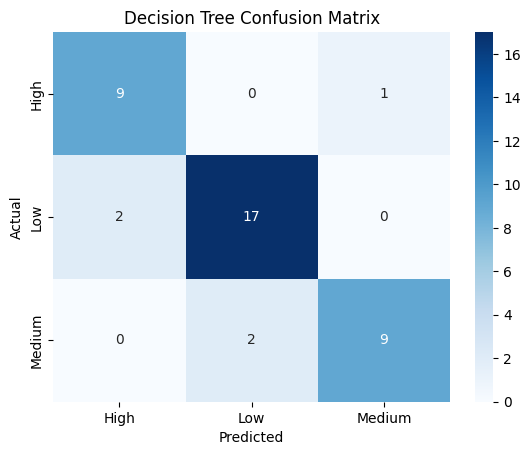

In [9]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


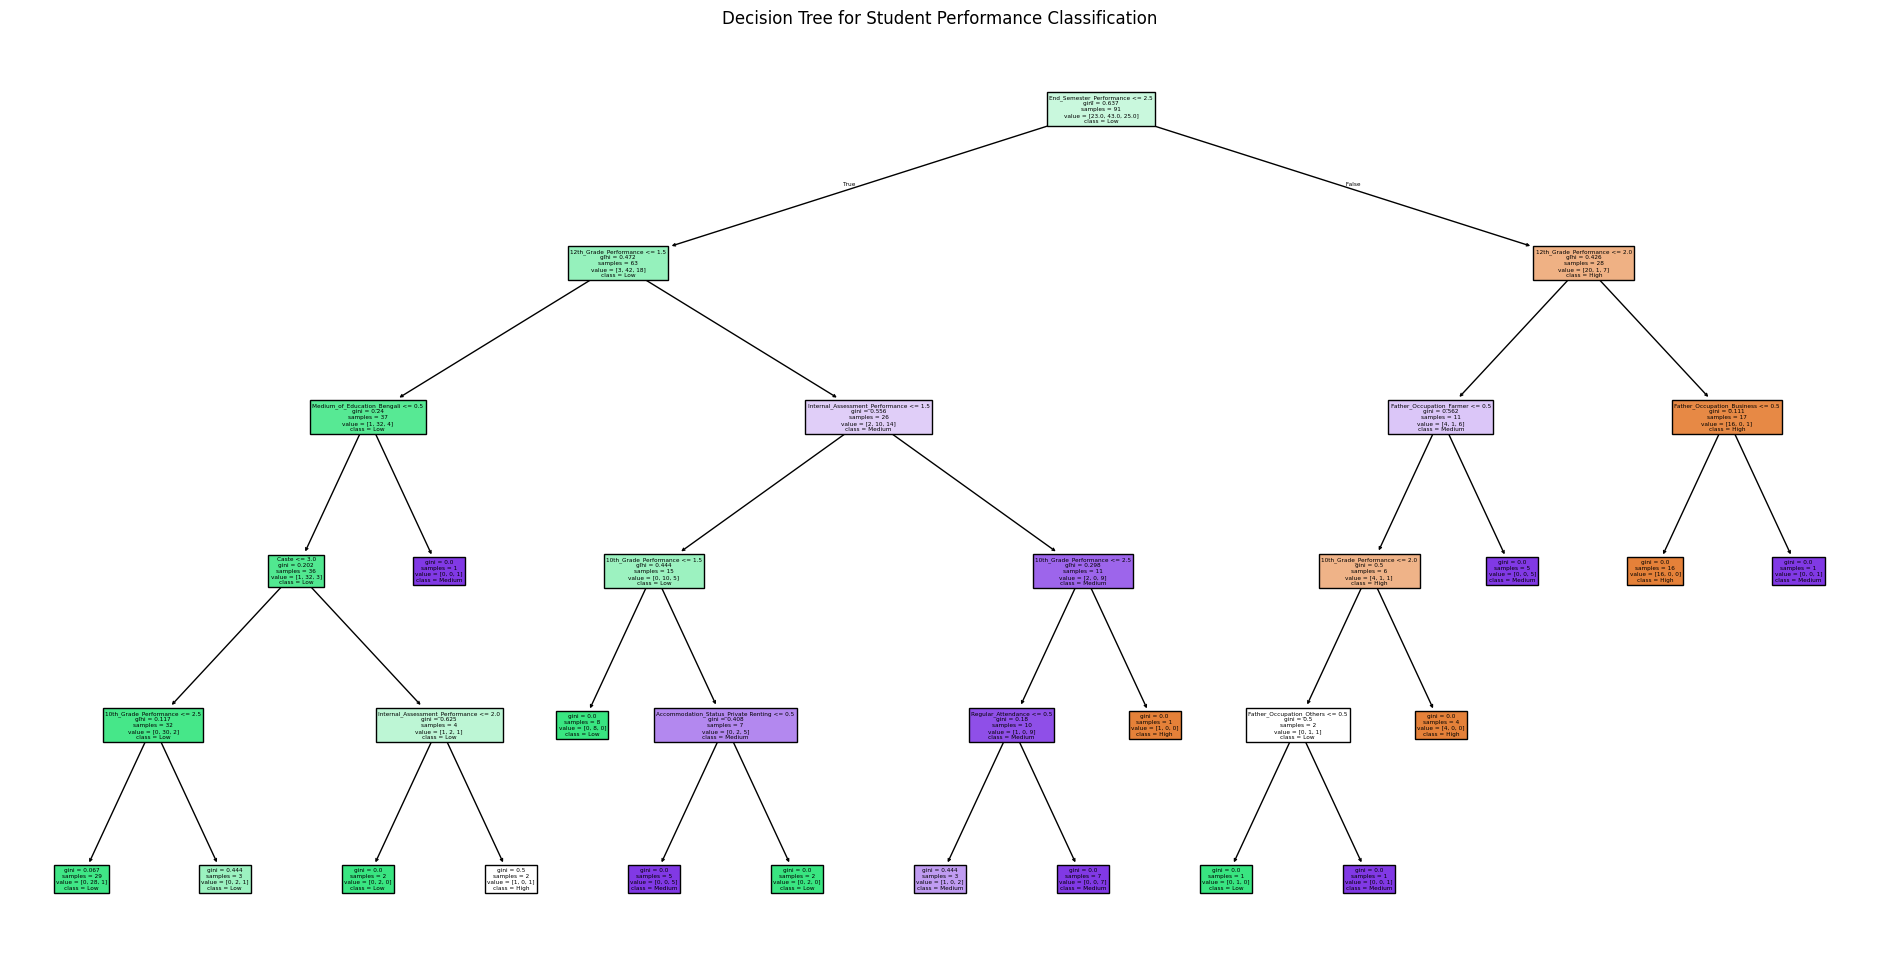

In [10]:
# Visualize the decision tree
plt.figure(figsize=(24, 12))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=dt_model.classes_)
plt.title("Decision Tree for Student Performance Classification")
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)


Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       0.78      0.95      0.86        19
      Medium       0.75      0.27      0.40        11

    accuracy                           0.78        40
   macro avg       0.77      0.74      0.71        40
weighted avg       0.77      0.78      0.73        40



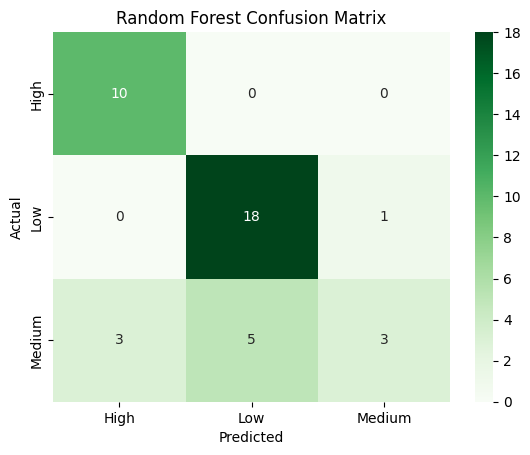

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap="Greens", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


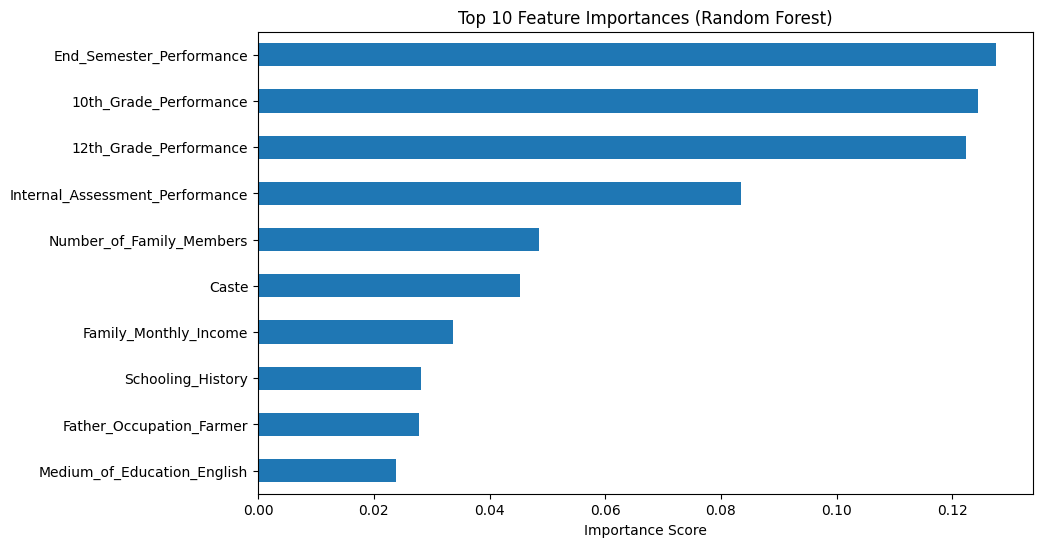

In [13]:
# Plot feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

top_features.plot(kind='barh', figsize=(10, 6), title="Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# Scale feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
from sklearn.model_selection import train_test_split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)


SVM Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.70      0.78        10
         Low       0.95      1.00      0.97        19
      Medium       0.75      0.82      0.78        11

    accuracy                           0.88        40
   macro avg       0.86      0.84      0.84        40
weighted avg       0.88      0.88      0.87        40



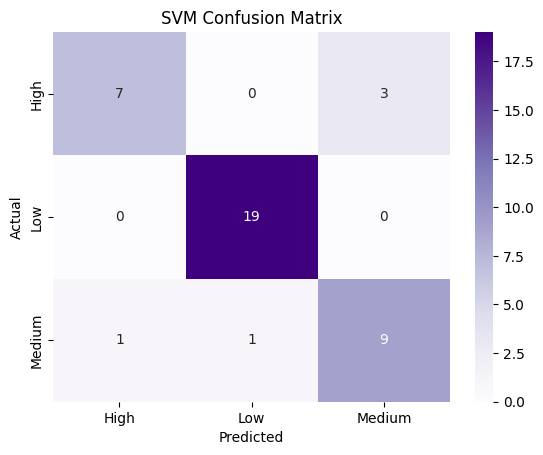

In [16]:
# Classification Report
print("SVM Classification Report:\n", classification_report(y_test_svm, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
sns.heatmap(cm_svm, annot=True, cmap="Purples", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


In [17]:
svm_results = pd.DataFrame({
    "Actual": y_test_svm,
    "Predicted": y_pred_svm
})
svm_results.to_csv("svm_predictions.csv", index=False)


In [18]:
# Combine predictions from all models into one file
dt_results = pd.read_csv("decision_tree_predictions.csv")
rf_results = pd.read_csv("random_forest_predictions.csv")
svm_results = pd.read_csv("svm_predictions.csv")

dt_results["Model"] = "Decision Tree"
rf_results["Model"] = "Random Forest"
svm_results["Model"] = "SVM"

combined = pd.concat([dt_results, rf_results, svm_results])
combined.to_csv("combined_model_predictions.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'decision_tree_predictions.csv'

In [19]:
# Decision Tree predictions
dt_results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
dt_results.to_csv("decision_tree_predictions.csv", index=False)


In [20]:
rf_results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_rf
})
rf_results.to_csv("random_forest_predictions.csv", index=False)


In [21]:
svm_results = pd.DataFrame({
    "Actual": y_test_svm,
    "Predicted": y_pred_svm
})
svm_results.to_csv("svm_predictions.csv", index=False)


In [22]:
# Add model labels
dt_results["Model"] = "Decision Tree"
rf_results["Model"] = "Random Forest"
svm_results["Model"] = "SVM"

# Combine
combined = pd.concat([dt_results, rf_results, svm_results])
combined.to_csv("combined_model_predictions.csv", index=False)


In [1]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).to_csv("feature_importance_rf.csv")


NameError: name 'pd' is not defined

In [2]:
# Get feature importances from your trained RF model
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort and export to CSV
importances.sort_values(ascending=False).to_csv("feature_importance_rf.csv")


NameError: name 'pd' is not defined

In [3]:
import pandas as pd  # ✅ Needed for Series and CSV

# If you've already trained rf_model and defined X, run this:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Save to CSV for Tableau
importances.sort_values(ascending=False).to_csv("feature_importance_rf.csv")


NameError: name 'rf_model' is not defined

In [4]:
# 1. Import libraries (if not already)
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 2. Assuming X and y are already defined and preprocessed (encoded, cleaned, etc.)
# Recreate the train-test split if needed
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Train the model again
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Get feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# 5. Save as CSV for Tableau
importances.sort_values(ascending=False).to_csv("feature_importance_rf.csv")


NameError: name 'X' is not defined

In [5]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 2. Load your dataset
df = pd.read_csv("Cleaned_StudentPerf_Final_Selected_Encoded.csv")

# 3. Recreate performance score & label (quantile-based for balance)
df["Performance_Score"] = df[[
    "10th_Grade_Performance",
    "12th_Grade_Performance",
    "Internal_Assessment_Performance",
    "End_Semester_Performance"
]].mean(axis=1)

df["Performance_Label"] = pd.qcut(
    df["Performance_Score"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# 4. Prepare X and y
X = df.drop(["Performance_Score", "Performance_Label"], axis=1)
X = pd.get_dummies(X)  # encode categorical
y = df["Performance_Label"]

# 5. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 6. Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 7. Get feature importances and save
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).to_csv("feature_importance_rf.csv")
